# Models Training

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
import pickle
import matplotlib.pyplot
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
import mlflow
import mlflow.xgboost

In [2]:
df_train = pd.read_csv('../data/processed/train.csv')
df_test = pd.read_csv('../data/processed/test.csv')

In [3]:
X = df_train.drop(columns = ['TARGET'])
Y = df_train['TARGET']

df_test2 = df_test
X_train, X_test, y_train, y_test = train_test_split(X, Y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(230633, 223) (76878, 223) (230633,) (76878,)


### Xgboost Classifier

In [4]:
from xgboost import XGBClassifier

In [19]:
XGB = XGBClassifier(objective='binary:logistic', eval_metric="logloss", use_label_encoder=False)
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='logloss', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [20]:
XGBpred = XGB.predict(X_test)

print(XGB.score(X_test,y_test))

0.9188064205624495


In [21]:
from sklearn.metrics import confusion_matrix

XGBmatrix = confusion_matrix(y_test,XGBpred)

<AxesSubplot:>

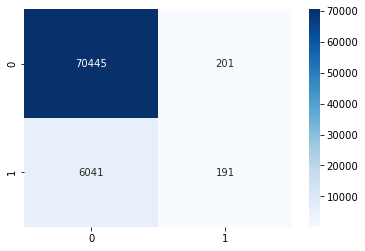

In [22]:
sb.heatmap(XGBmatrix,annot=True, fmt='g', cmap='Blues')

In [23]:
print("Accuracy : " + str(accuracy_score(y_test, XGBpred)))

Accuracy : 0.9188064205624495


In [24]:
print("Precision : " + str(precision_score(y_test, XGBpred)))

Precision : 0.4872448979591837


### RandomForest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=50)

In [12]:
RFCpred = RFC.predict(X_test)
print(RFC.score(X_test,y_test))

0.9188714586747834


<AxesSubplot:>

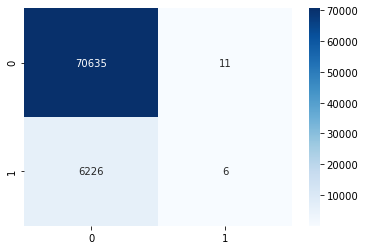

In [13]:
RFCmatrix = confusion_matrix(y_test, RFCpred)
sb.heatmap(RFCmatrix,annot=True, fmt ='g',  cmap='Blues')

In [14]:
print("Accuracy : " + str(accuracy_score(y_test, RFCpred)))

Accuracy : 0.9188714586747834


In [15]:
print("Precision : " + str(precision_score(y_test, RFCpred)))

Precision : 0.35294117647058826


### GradientBossting Classifier

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import  confusion_matrix

GBC = GradientBoostingClassifier()
GBC.fit(X_train, y_train)

GradientBoostingClassifier()

In [26]:
GBCpred = GBC.predict(X_test)
print(GBC.score(X_test,y_test))

0.919118603501652


<AxesSubplot:>

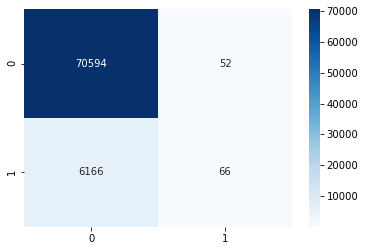

In [27]:
from sklearn.metrics import confusion_matrix

cmGBC = confusion_matrix(y_test,GBCpred)

sb.heatmap(cmGBC,annot=True, fmt='g', cmap='Blues')

In [28]:
print("Accuracy : " + str(accuracy_score(y_test, GBCpred)))

Accuracy : 0.919118603501652


In [29]:
print("Precision : " + str(precision_score(y_test, GBCpred)))

Precision : 0.559322033898305
